In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 6s - loss: 3.2757 - accuracy: 0.0391
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 1s 43ms/step - loss: 3.2744 - accuracy: 0.0485 - val_loss: 3.2547 - val_accuracy: 0.0580
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2659 - accuracy: 0.0391
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 3.2649 - accuracy: 0.0405 - val_loss: 3.2486 - val_accuracy: 0.0607
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2334 - accuracy: 0.0859
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 3.2417 - accuracy: 0.0529 - val_loss: 3.2413 - val_accuracy: 0.0660
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 3.2460 - accuracy: 0.0391
Epoch 4: sav

9/9 [==============================] - 0s 13ms/step - loss: 2.9348 - accuracy: 0.1374 - val_loss: 2.8933 - val_accuracy: 0.1900
Epoch 29/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.9507 - accuracy: 0.1562
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.9310 - accuracy: 0.1559 - val_loss: 2.8718 - val_accuracy: 0.2111
Epoch 30/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.7650 - accuracy: 0.1875
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.8962 - accuracy: 0.1604 - val_loss: 2.8493 - val_accuracy: 0.2427
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.9626 - accuracy: 0.1484
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.8930 - accuracy: 0.1586 - val_loss: 2.

Epoch 56/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.6362 - accuracy: 0.1719
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.5936 - accuracy: 0.2009 - val_loss: 2.3691 - val_accuracy: 0.3061
Epoch 57/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.5612 - accuracy: 0.2188
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 35ms/step - loss: 2.5894 - accuracy: 0.2097 - val_loss: 2.3537 - val_accuracy: 0.3166
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4758 - accuracy: 0.2344
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.5674 - accuracy: 0.2035 - val_loss: 2.3370 - val_accuracy: 0.3166
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.5760 - accuracy: 0.2188
Epoch

1/9 [==>...........................] - ETA: 0s - loss: 2.5131 - accuracy: 0.2344
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.4638 - accuracy: 0.2335 - val_loss: 2.1577 - val_accuracy: 0.3747
Epoch 84/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4962 - accuracy: 0.1953
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.4330 - accuracy: 0.2396 - val_loss: 2.1519 - val_accuracy: 0.3668
Epoch 85/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4625 - accuracy: 0.2578
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.4456 - accuracy: 0.2352 - val_loss: 2.1444 - val_accuracy: 0.3668
Epoch 86/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4494 - accuracy: 0.2031
Epoch 86: saving mo

1/9 [==>...........................] - ETA: 0s - loss: 2.3637 - accuracy: 0.2891
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.3671 - accuracy: 0.2678 - val_loss: 2.0186 - val_accuracy: 0.4222
Epoch 111/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4127 - accuracy: 0.2266
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 2.3524 - accuracy: 0.2581 - val_loss: 2.0042 - val_accuracy: 0.4380
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.3228 - accuracy: 0.2734
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.3240 - accuracy: 0.2643 - val_loss: 1.9962 - val_accuracy: 0.4274
Epoch 113/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4761 - accuracy: 0.2266
Epoch 113: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.3691 - accuracy: 0.1953
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.3025 - accuracy: 0.2705 - val_loss: 1.9360 - val_accuracy: 0.4538
Epoch 138/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4800 - accuracy: 0.2188
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.2934 - accuracy: 0.2652 - val_loss: 1.9339 - val_accuracy: 0.4538
Epoch 139/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2622 - accuracy: 0.2812
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.2956 - accuracy: 0.2714 - val_loss: 1.9317 - val_accuracy: 0.4459
Epoch 140/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2914 - accuracy: 0.3125
Epoch 140: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.2317 - accuracy: 0.2969
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.2699 - accuracy: 0.2749 - val_loss: 1.8769 - val_accuracy: 0.4934
Epoch 165/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0913 - accuracy: 0.2812
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.2420 - accuracy: 0.2969 - val_loss: 1.8759 - val_accuracy: 0.4934
Epoch 166/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1650 - accuracy: 0.2734
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.2222 - accuracy: 0.3154 - val_loss: 1.8750 - val_accuracy: 0.5040
Epoch 167/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0401 - accuracy: 0.3203
Epoch 167: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.2201 - accuracy: 0.3125
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.2239 - accuracy: 0.2899 - val_loss: 1.8422 - val_accuracy: 0.5040
Epoch 192/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4060 - accuracy: 0.2656
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.2442 - accuracy: 0.2881 - val_loss: 1.8365 - val_accuracy: 0.5145
Epoch 193/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1223 - accuracy: 0.3125
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.2181 - accuracy: 0.2960 - val_loss: 1.8309 - val_accuracy: 0.5224
Epoch 194/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1749 - accuracy: 0.3359
Epoch 194: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.1247 - accuracy: 0.3594
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.1330 - accuracy: 0.3313 - val_loss: 1.8042 - val_accuracy: 0.5330
Epoch 219/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2851 - accuracy: 0.2422
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 23ms/step - loss: 2.2133 - accuracy: 0.3066 - val_loss: 1.7970 - val_accuracy: 0.5383
Epoch 220/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1575 - accuracy: 0.2969
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.2112 - accuracy: 0.3013 - val_loss: 1.7957 - val_accuracy: 0.5488
Epoch 221/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0646 - accuracy: 0.4062
Epoch 221: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.1898 - accuracy: 0.2734
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 20ms/step - loss: 2.2297 - accuracy: 0.2978 - val_loss: 1.7701 - val_accuracy: 0.5541
Epoch 246/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9989 - accuracy: 0.3828
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 2.1948 - accuracy: 0.2916 - val_loss: 1.7707 - val_accuracy: 0.5541
Epoch 247/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2342 - accuracy: 0.2656
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.1639 - accuracy: 0.3154 - val_loss: 1.7652 - val_accuracy: 0.5462
Epoch 248/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1951 - accuracy: 0.3281
Epoch 248: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.1909 - accuracy: 0.3047
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.1279 - accuracy: 0.3313 - val_loss: 1.7495 - val_accuracy: 0.5515
Epoch 273/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1640 - accuracy: 0.3047
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.0988 - accuracy: 0.3348 - val_loss: 1.7453 - val_accuracy: 0.5620
Epoch 274/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0460 - accuracy: 0.3047
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.1331 - accuracy: 0.3445 - val_loss: 1.7433 - val_accuracy: 0.5699
Epoch 275/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1468 - accuracy: 0.3516
Epoch 275: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.1456 - accuracy: 0.3125
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 2.1193 - accuracy: 0.3445 - val_loss: 1.7011 - val_accuracy: 0.5726
Epoch 300/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1883 - accuracy: 0.3047
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 2.1475 - accuracy: 0.3172 - val_loss: 1.7131 - val_accuracy: 0.5752
Epoch 301/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1956 - accuracy: 0.3203
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 2.1427 - accuracy: 0.3313 - val_loss: 1.7158 - val_accuracy: 0.5778
Epoch 302/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2347 - accuracy: 0.2188
Epoch 302: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.2632 - accuracy: 0.2812
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 18ms/step - loss: 2.1138 - accuracy: 0.3278 - val_loss: 1.6644 - val_accuracy: 0.5910
Epoch 327/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0747 - accuracy: 0.3438
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 2.1219 - accuracy: 0.3189 - val_loss: 1.6699 - val_accuracy: 0.5989
Epoch 328/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9739 - accuracy: 0.3359
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.1280 - accuracy: 0.3093 - val_loss: 1.6827 - val_accuracy: 0.5831
Epoch 329/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1423 - accuracy: 0.3047
Epoch 329: sa

1/9 [==>...........................] - ETA: 0s - loss: 1.9173 - accuracy: 0.4141
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 2.0539 - accuracy: 0.3374 - val_loss: 1.6472 - val_accuracy: 0.5937
Epoch 354/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9455 - accuracy: 0.3438
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.0874 - accuracy: 0.3401 - val_loss: 1.6622 - val_accuracy: 0.5699
Epoch 355/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.8893 - accuracy: 0.4453
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.0333 - accuracy: 0.3357 - val_loss: 1.6614 - val_accuracy: 0.5752
Epoch 356/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1831 - accuracy: 0.2656
Epoch 356: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0426 - accuracy: 0.3125
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.0078 - accuracy: 0.3242 - val_loss: 1.6204 - val_accuracy: 0.6016
Epoch 381/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0788 - accuracy: 0.3359
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 19ms/step - loss: 2.0487 - accuracy: 0.3357 - val_loss: 1.6151 - val_accuracy: 0.6042
Epoch 382/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9360 - accuracy: 0.3516
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 2.0590 - accuracy: 0.3242 - val_loss: 1.6216 - val_accuracy: 0.6016
Epoch 383/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1609 - accuracy: 0.2969
Epoch 383: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0335 - accuracy: 0.2734
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 17ms/step - loss: 2.0213 - accuracy: 0.3656 - val_loss: 1.6167 - val_accuracy: 0.5937
Epoch 408/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0687 - accuracy: 0.3359
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 2.0005 - accuracy: 0.3674 - val_loss: 1.6126 - val_accuracy: 0.5989
Epoch 409/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.0079 - accuracy: 0.3750
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.0266 - accuracy: 0.3551 - val_loss: 1.6203 - val_accuracy: 0.6042
Epoch 410/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.9166 - accuracy: 0.3672
Epoch 410: sa

1/9 [==>...........................] - ETA: 0s - loss: 2.0319 - accuracy: 0.3828
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 15ms/step - loss: 2.0294 - accuracy: 0.3604 - val_loss: 1.6070 - val_accuracy: 0.6174
Epoch 435/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2025 - accuracy: 0.2891
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 2.0451 - accuracy: 0.3524 - val_loss: 1.6050 - val_accuracy: 0.6148
Epoch 436/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.8734 - accuracy: 0.3906
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 20ms/step - loss: 1.9926 - accuracy: 0.3674 - val_loss: 1.6123 - val_accuracy: 0.6121
Epoch 436: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 8ms/step - loss: 1.6123 - accuracy: 0.6121


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 88ms/step
[2.50210822e-01 1.23885123e-03 1.37833161e-02 4.30022785e-03
 4.17720005e-02 1.00928859e-03 1.14615010e-04 6.12887334e-06
 2.52336469e-02 4.33656648e-02 4.72613424e-03 1.49681671e-02
 8.77881274e-02 1.10242516e-01 7.54398108e-02 1.37234770e-03
 1.73300250e-05 8.52057245e-04 1.30166262e-01 7.75267482e-02
 5.18673100e-04 2.82481778e-03 6.00795785e-04 3.41919884e-02
 7.25466982e-02 5.18300990e-03]
0


# Confusion matrix

12/12 [==============================] - 0s 1ms/step


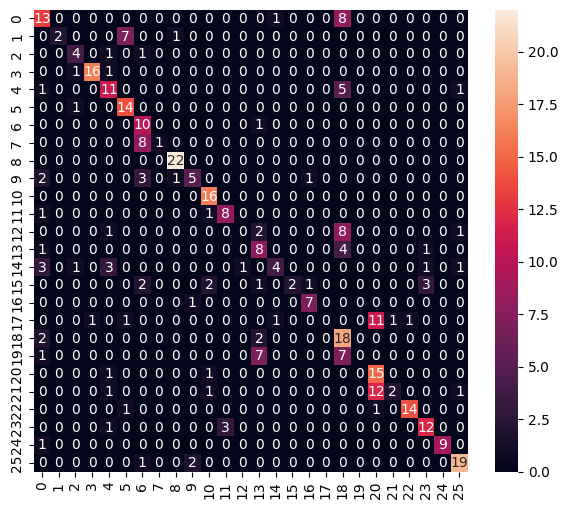

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.59      0.55        22
           1       1.00      0.20      0.33        10
           2       0.57      0.67      0.62         6
           3       0.94      0.89      0.91        18
           4       0.55      0.61      0.58        18
           5       0.61      0.93      0.74        15
           6       0.40      0.91      0.56        11
           7       1.00      0.11      0.20         9
           8       0.92      1.00      0.96        22
           9       0.62      0.42      0.50        12
          10       0.76      1.00      0.86        16
          11       0.73      0.80      0.76        10
          12       0.00      0.00      0.00        12
          13       0.38      0.57      0.46        14
          14       0.67      0.29      0.40        14
          15       1.00      0.18      0.31        11
          16       0.78      0.88      0.82         8
     

C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohamed alameen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmp80bt39dl\assets


INFO:tensorflow:Assets written to: C:\Users\MOHAME~1\AppData\Local\Temp\tmp80bt39dl\assets


7512

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.5021079e-01 1.2388529e-03 1.3783317e-02 4.3002334e-03 4.1772015e-02
 1.0092889e-03 1.1461537e-04 6.1288952e-06 2.5233667e-02 4.3365657e-02
 4.7261398e-03 1.4968190e-02 8.7788112e-02 1.1024249e-01 7.5439781e-02
 1.3723493e-03 1.7330070e-05 8.5205742e-04 1.3016622e-01 7.7526748e-02
 5.1867374e-04 2.8248203e-03 6.0079625e-04 3.4192011e-02 7.2546683e-02
 5.1830173e-03]
0
